# Analisi percorso lavorativo studenti

### Caricamento dati e selezione variabili interessanti

In [36]:
tab <- read.table('GEPPS_Microdati_Anno_2015.txt', sep = '\t', header = TRUE)
head(tab)

progr,V0_5,CITTAD,V0_3_MICRO,V0_4,ETA_DIPLO_MFR,scuola_pubblica,V0_8,V0_9,V1_1,...,V6_7,V6_8,V6_9,V6_10,V6_11,V6_12,V6_13,V6_14,coeff,mesi_dip_int
38566,1,1,NA,1,1,1,64,5,1,...,1,2,NA,3,1,1,2,NA,8.987902,51
58089,1,1,NA,NA,1,1,73,2,2,...,1,2,NA,3,3,NA,NA,NA,6.248402,47
10262,1,1,4,NA,1,1,69,2,2,...,1,2,NA,4,1,3,NA,NA,35.726681,51
15877,1,1,4,NA,1,0,73,2,1,...,1,3,NA,2,1,1,4,NA,2.656289,47
16542,1,1,7,1,1,1,90,5,2,...,2,NA,2,2,3,NA,NA,NA,23.093444,51
16657,1,1,7,2,1,1,72,5,2,...,1,5,NA,3,1,1,3,NA,7.596227,50


In [111]:
filtered_table <- tab[c('V0_5', 'CITTAD','scuola_pubblica', 'V0_8','V3_3', 'V3_12','V3_17', 'V3_19', 'V3_23', 'V4_4_MICRO', 'V4_5_MICRO', 'V4_23','RED_PRI_MFR', 'V4_38', 'V6_5', 'V6_10')]

In [112]:
names(filtered_table)<- c('sesso', 'cittadinanza', 'scuola_pubblica', 'voto_diploma', 'iscrizione_universita', 'tipo_di_corso', 'area_disciplinare', 'frequenza_lezioni', 'corso_desiderato','posizione_dipendente', 'posizione_autonomo', 'ore_settimanali', 'reddito_mensile', 'soddisfazione_lavoro', 'titolo_padre', 'titolo_madre')

In [113]:
head(filtered_table)

sesso,cittadinanza,scuola_pubblica,voto_diploma,iscrizione_universita,tipo_di_corso,area_disciplinare,frequenza_lezioni,corso_desiderato,posizione_dipendente,posizione_autonomo,ore_settimanali,reddito_mensile,soddisfazione_lavoro,titolo_padre,titolo_madre
1,1,1,64,1,3,16,2,1,NA,NA,NA,NA,NA,2,3
1,1,1,73,1,1,16,1,1,NA,NA,NA,NA,NA,3,3
1,1,1,69,1,1,9,1,1,NA,NA,NA,NA,NA,5,4
1,1,0,73,1,1,13,3,2,5,NA,48,1300,6,3,2
1,1,1,90,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,2
1,1,1,72,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,5,3


In [83]:
filtered_table$sesso <- factor(filtered_table$sesso)
levels(filtered_table$sesso) <- c('maschio', 'femmina')

In [116]:
filtered_table$corso_desiderato <- factor(filtered_table$corso_desiderato)
levels(filtered_table$corso_desiderato) <- c('si','no')

In [124]:
filtered_table$reddito_mensile <- as.numeric(filtered_table$reddito_mensile)

In [82]:
head(filtered_table)

sesso,cittadinanza,scuola_pubblica,voto_diploma,iscrizione_universita,tipo_di_corso,area_disciplinare,frequenza_lezioni,posizione_dipendente,posizione_autonomo,ore_settimanali,reddito_mensile,soddisfazione_lavoro,titolo_padre,titolo_madre
maschio,1,1,64,1,3,16,2,NA,NA,NA,NA,NA,2,3
maschio,1,1,73,1,1,16,1,NA,NA,NA,NA,NA,3,3
maschio,1,1,69,1,1,9,1,NA,NA,NA,NA,NA,5,4
maschio,1,0,73,1,1,13,3,5,NA,48,1300,6,3,2
maschio,1,1,90,2,NA,NA,NA,NA,NA,NA,NA,NA,3,2
maschio,1,1,72,2,NA,NA,NA,NA,NA,NA,NA,NA,5,3


### Un po' di stime a caso sul voto di diploma

In [175]:
m1 = mean(filtered_table[filtered_table$scuola_pubblica == 1,'voto_diploma'])
m1
m2 = mean(filtered_table[filtered_table$scuola_pubblica == 0,'voto_diploma'])
m2
sd1 = sd(filtered_table[filtered_table$scuola_pubblica == 1,'voto_diploma'])/length(filtered_table[filtered_table$scuola_pubblica == 1,])
sd2 = sd(filtered_table[filtered_table$scuola_pubblica == 0,'voto_diploma'])/length(filtered_table[filtered_table$scuola_pubblica == 0,])
sd1*3
sd2*3

[1] 75.66433

[1] 73.40236

[1] 2.149072

[1] 2.053187

Stime con intervalli a 3$\sigma$ di CL: $75.66 \pm 2.15$ e $73.42 \pm 2.05$

In [180]:
z = (m1-m2)/sqrt(sd1 + sd2)
1-pnorm(z, 0, sqrt(sd1 + sd2))

[1] 0.05317452

L'ipotesi di medie uguali non può essere rifiutata con una significatività del 10%. Questo porta concludere che statisticamente non i dati non sono sufficienti per rifiutare l'ipotesi nulla...

Una differenza anche tra i voti in base al sesso

In [62]:
mean(filtered_table[filtered_table$sesso == 1,'voto_diploma'])
mean(filtered_table[filtered_table$sesso == 2,'voto_diploma'])

[1] 73.66248

[1] 77.08161

Anche il blox plot conferma una distribuzione dei valori sostanzialmente paritaria tra le due condizioni

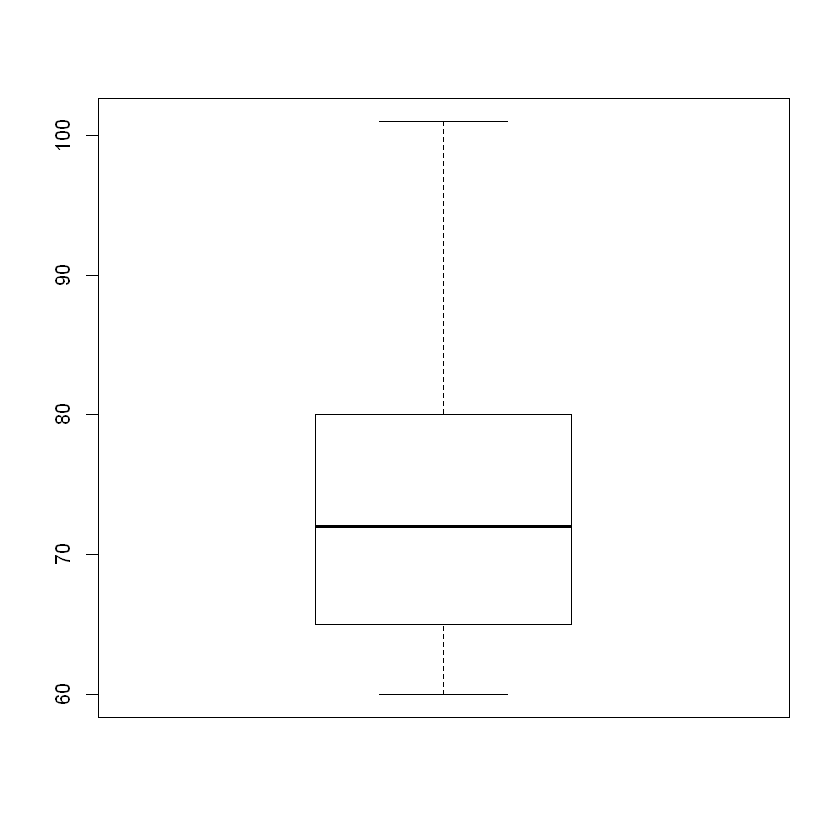

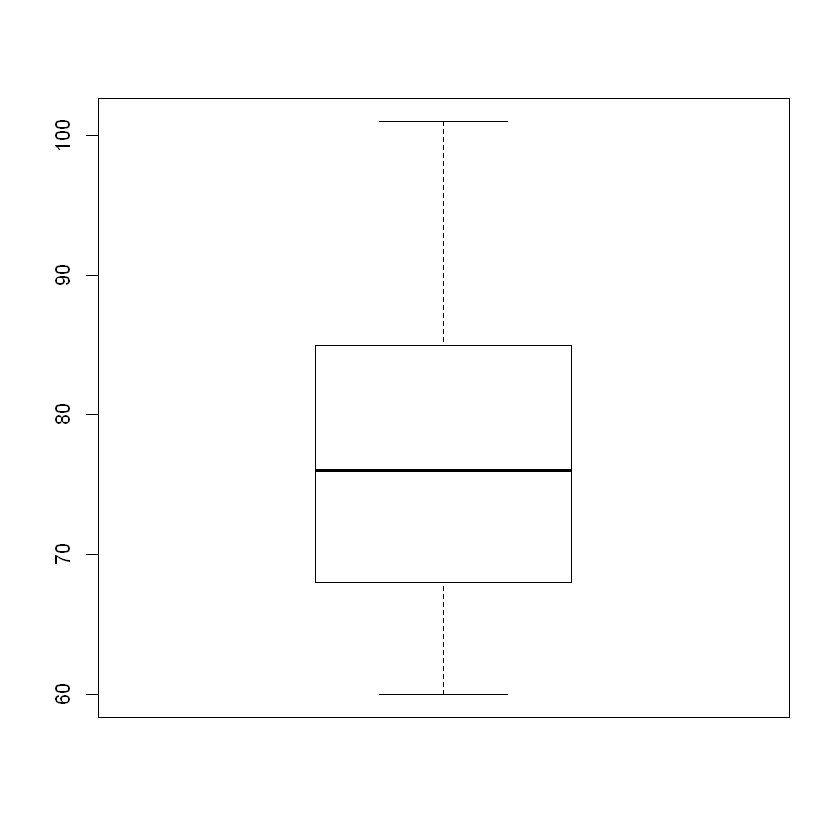

In [166]:
boxplot(filtered_table[filtered_table$sesso == 1,'voto_diploma'])
boxplot(filtered_table[filtered_table$sesso == 2,'voto_diploma'])

### Vediamo se l'istruzione dei genitori ha una certa influenza sui risultati dei figli

In [89]:
summary(table(filtered_table$titolo_madre, filtered_table$scuola_pubblica))
summary(table(filtered_table$titolo_padre, filtered_table$scuola_pubblica))

Number of cases in table: 26235 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 63.68, df = 5, p-value = 2.107e-12

Number of cases in table: 26235 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 124.19, df = 5, p-value = 4.073e-25

In [90]:
summary(table(filtered_table$titolo_madre, filtered_table$voto_diploma))
summary(table(filtered_table$titolo_padre, filtered_table$voto_diploma))

Number of cases in table: 26235 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 919.5, df = 205, p-value = 5.066e-91
	Chi-squared approximation may be incorrect

Number of cases in table: 26235 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 863.7, df = 205, p-value = 1.196e-81
	Chi-squared approximation may be incorrect

I p-value confermano, come atteso, una forte dipendenza tra la scolarizzazione dei genitori ed il voto di diploma dei figli, indipendentemente se quella del padre o della madre. Visualizziamolo con un boxplot

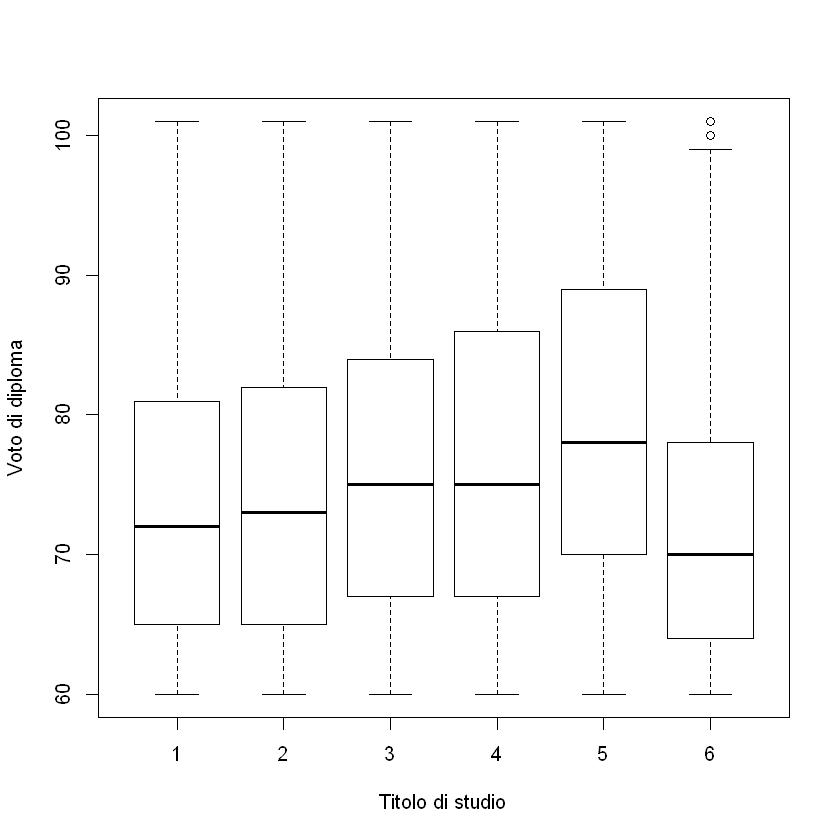

In [97]:
boxplot(filtered_table$voto_diploma~filtered_table$titolo_padre, xlab = 'Titolo di studio', ylab = 'Voto di diploma')

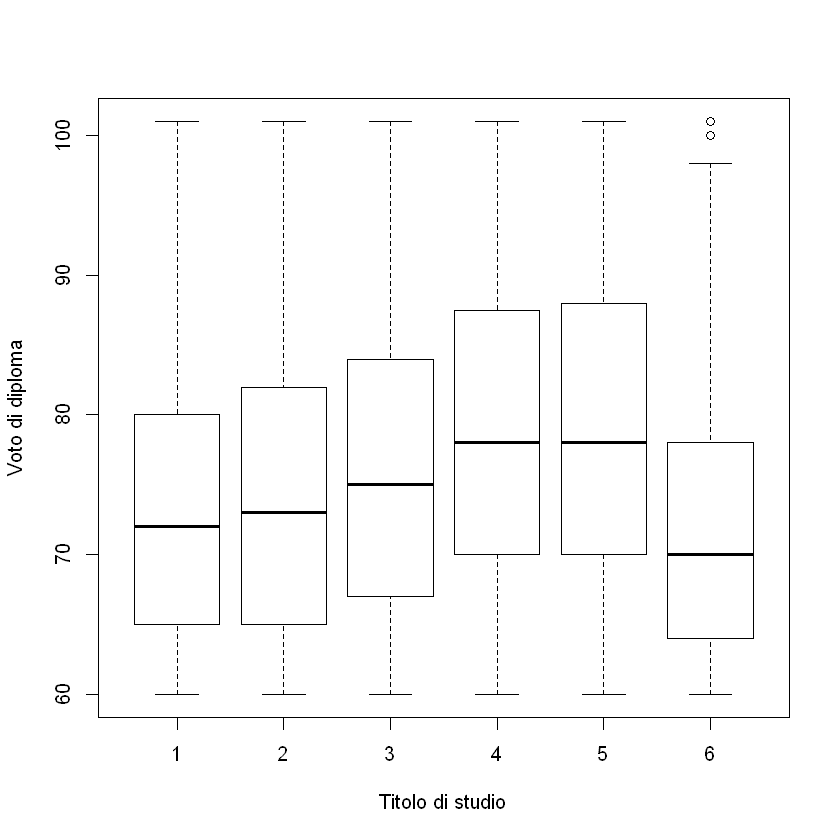

In [98]:
boxplot(filtered_table$voto_diploma~filtered_table$titolo_madre, xlab = 'Titolo di studio', ylab = 'Voto di diploma')

L'andamento dei boxplot è analogo indipendentemente dal sesso del genitore. Il caso '6' indica un missing value e quindi di poco interesse.

Vediamo ora se è legata anche all'iscrizione universitaria

In [110]:
summary(table(filtered_table$iscrizione_universita,filtered_table$titolo_padre))

Number of cases in table: 26235 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 2243.1, df = 5, p-value = 0

La situazione di indipendenza è rifiutabile con una significatività pressoché nulla e difatti è osservabile anche nel box plot seguente come ci sia una maggiore percentuale di iscritti in università

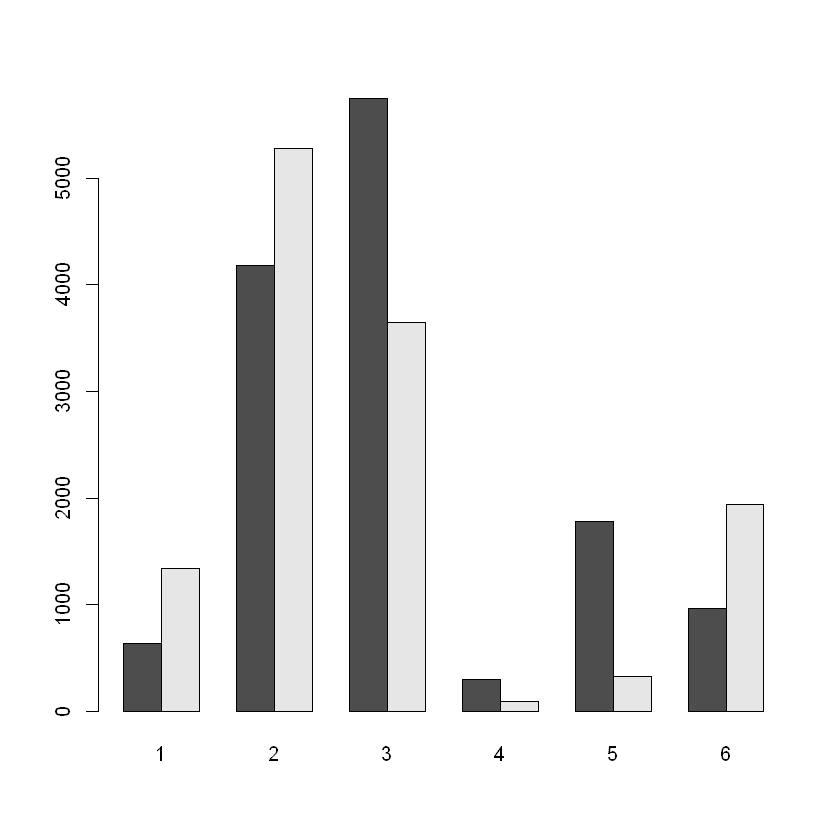

In [108]:
barplot(table(filtered_table$iscrizione_universita,filtered_table$titolo_padre), beside = TRUE)

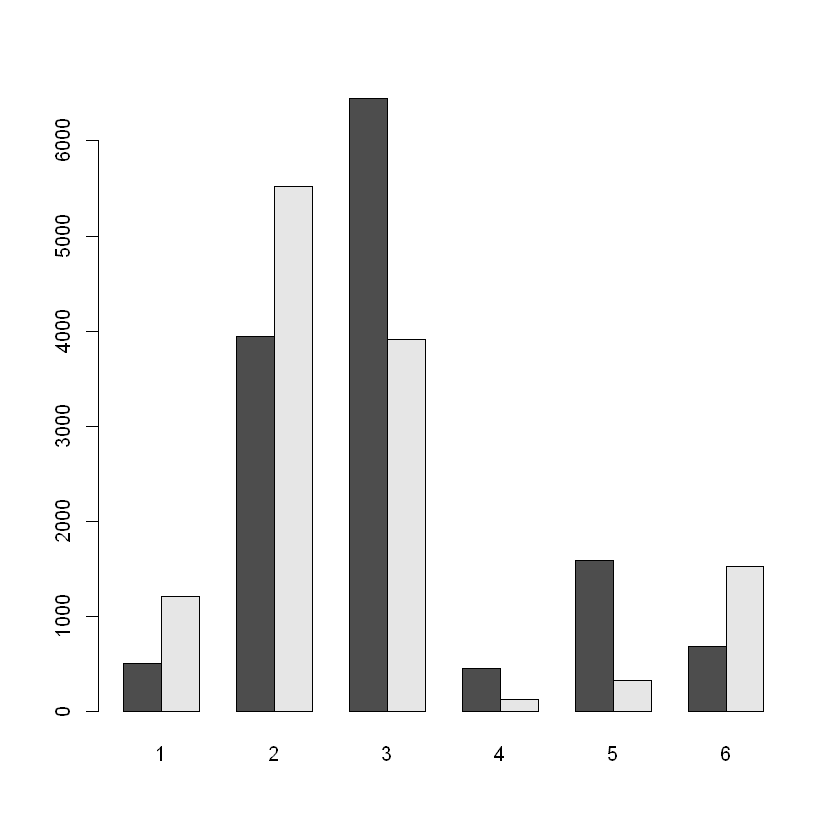

In [114]:
barplot(table(filtered_table$iscrizione_universita,filtered_table$titolo_madre), beside = TRUE)